In [2]:
import cv2
import numpy as np

from objtect import ObjectDetector
from tf_api import TFObjectDetectionAPI
from object_detection.utils import visualization_utils as vis_util

import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [3]:

PATH_TO_TEST_IMAGES_DIR = './data/images/'
TEST_IMAGE_PATHS = glob.glob(PATH_TO_TEST_IMAGES_DIR+"/*.jpg")
print(TEST_IMAGE_PATHS)
IMAGE_SIZE = (12, 8)


<class 'numpy.ndarray'>


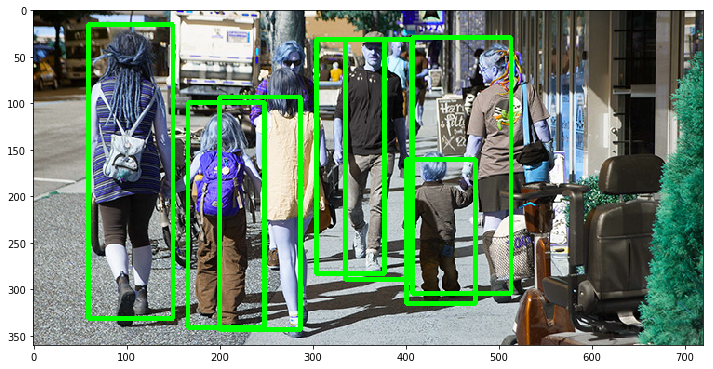

In [5]:

detector = TFObjectDetectionAPI()
for image_path in TEST_IMAGE_PATHS:
    image = cv2.imread(image_path)
    decision = ObjectDetector(image, detector)
    img = image
    print(type(img))
    for i in range(decision.length()):
        if decision.getInstance(i).getClass()=='person' and decision.getInstance(i).getScore() > 0.3 :
            img = cv2.polylines(img, [np.int32(decision.getInstance(i).getBox())], 1, (0, 255, 0), 3)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(img)
    plt.show()